<a href="https://colab.research.google.com/github/rgsanabria/DatasetsSanabria/blob/main/DatasetsSanabria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ABSTRACT

El dataset sobre la elegibilidad de las tarjetas de crédito ofrece una colección de datos que permite a los analistas desarrollar un entendimiento de los factores que influyen en la aprobación de tarjetas de crédito. Este conjunto de datos incluye una amplia gama de atributos demográficos, financieros y de comportamiento de los solicitantes de tarjetas de crédito, proporcionando una base para el análisis y la construcción de modelos predictivos.

Entre los atributos demográficos, se encuentran la edad, el género, el estado civil y el número de dependientes del solicitante. Los atributos financieros incluyen el ingreso anual, el saldo actual de la cuenta bancaria, el historial de crédito y las deudas existentes. Los atributos de comportamiento abarcan el historial de pagos, el número de cuentas de crédito abiertas y las consultas recientes de crédito. Este variado conjunto de datos permite un análisis multidimensional de los solicitantes de tarjetas de crédito, facilitando la identificación de patrones y tendencias que pueden influir en la decisión de aprobación.


Preguntas
¿Cuáles son los principales factores demográficos que influyen en la aprobación de las tarjetas de crédito?
¿Cómo afecta el historial de crédito de un solicitante a la probabilidad de aprobación de su tarjeta de crédito?
¿Existe una correlación significativa entre el ingreso anual de un solicitante y la aprobación de su tarjeta de crédito?


In [74]:
#Importando librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set()

In [20]:
from google.colab import drive
import os
drive.mount('/content/dataset')

Drive already mounted at /content/dataset; to attempt to forcibly remount, call drive.mount("/content/dataset", force_remount=True).


In [21]:
df = pd.read_csv ('/content/dataset/MyDrive/CODER/DATA/Proyecto/Dataset/dataset.csv')
(df.head (5))

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [17]:
df.shape

(9709, 20)

In [25]:
df. describe()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Target
count,9.709000e+03,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9.709000e+03,9709.000000,9709.000000,9709.000000
mean,5.076105e+06,0.348749,0.367700,0.671542,0.217427,0.287671,0.087548,0.174683,0.422804,2.182614,27.270059,1.812282e+05,43.784093,5.664730,0.132145
std,4.080270e+04,0.476599,0.482204,0.469677,0.412517,0.452700,0.282650,0.379716,0.767019,0.932918,16.648057,9.927731e+04,11.625768,6.342241,0.338666
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.700000e+04,20.504186,0.000000,0.000000
25%,5.036955e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,13.000000,1.125000e+05,34.059563,0.928150,0.000000
50%,5.069449e+06,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,26.000000,1.575000e+05,42.741466,3.761884,0.000000
75%,5.112986e+06,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,41.000000,2.250000e+05,53.567151,8.200031,0.000000
max,5.150479e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,20.000000,60.000000,1.575000e+06,68.863837,43.020733,1.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   object 
 15  Education_type   9709 non-null   object 
 16  Family_status    9709 non-null   object 
 17  Housing_type  

In [54]:
df.drop(['ID'], axis=1, inplace=True)
df

,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,0,0,0,0,0,0,0,0,2,20,180000.0,56.400884,0.542106,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,Laborers,1
9705,0,0,1,1,1,0,0,0,2,19,112500.0,43.360233,7.375921,Commercial associate,Secondary / secondary special,Married,House / apartment,Other,1
9706,1,1,1,0,0,0,0,0,2,21,90000.0,52.296762,4.711938,Working,Secondary / secondary special,Married,House / apartment,Other,1
9707,0,0,1,0,1,1,0,0,2,32,157500.0,33.914454,3.627727,Pensioner,Higher education,Married,House / apartment,Medicine staff,1


In [68]:
# Distribución de Cliente
df.rename(mapper={
    'Gender': 'Is_Female',
    'Work_phone': 'Has_Work_Phone',
    'Phone': 'Has_Phone',
    'Email': 'Has_Email'
}, axis=1, inplace=True)
df

,Is_Female,Own_car,Own_property,Has_Work_Phone,Has_Phone,Has_Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,0,0,0,0,0,0,0,0,2,20,180000.0,56.400884,0.542106,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,Laborers,1
9705,0,0,1,1,1,0,0,0,2,19,112500.0,43.360233,7.375921,Commercial associate,Secondary / secondary special,Married,House / apartment,Other,1
9706,1,1,1,0,0,0,0,0,2,21,90000.0,52.296762,4.711938,Working,Secondary / secondary special,Married,House / apartment,Other,1
9707,0,0,1,0,1,1,0,0,2,32,157500.0,33.914454,3.627727,Pensioner,Higher education,Married,House / apartment,Medicine staff,1


In [69]:
df.describe()


,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Target
count,9709.000000,9709.000000,9709.000000,9.709000e+03,9709.000000,9709.000000,9709.000000
mean,0.422804,2.182614,27.270059,1.812282e+05,43.784093,5.664730,0.132145
std,0.767019,0.932918,16.648057,9.927731e+04,11.625768,6.342241,0.338666
min,0.000000,1.000000,0.000000,2.700000e+04,20.504186,0.000000,0.000000
25%,0.000000,2.000000,13.000000,1.125000e+05,34.059563,0.928150,0.000000
50%,0.000000,2.000000,26.000000,1.575000e+05,42.741466,3.761884,0.000000
75%,1.000000,3.000000,41.000000,2.250000e+05,53.567151,8.200031,0.000000
max,19.000000,20.000000,60.000000,1.575000e+06,68.863837,43.020733,1.000000


In [70]:
cols_to_convert = ['Is_Female', 'Own_car', 'Own_property', 'Has_Work_Phone',
                  'Has_Phone', 'Has_Email', 'Unemployed']
for col in cols_to_convert:
    df[col] = df[col].apply(str)
df

,Is_Female,Own_car,Own_property,Has_Work_Phone,Has_Phone,Has_Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,0,0,0,0,0,0,0,0,2,20,180000.0,56.400884,0.542106,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,Laborers,1
9705,0,0,1,1,1,0,0,0,2,19,112500.0,43.360233,7.375921,Commercial associate,Secondary / secondary special,Married,House / apartment,Other,1
9706,1,1,1,0,0,0,0,0,2,21,90000.0,52.296762,4.711938,Working,Secondary / secondary special,Married,House / apartment,Other,1
9707,0,0,1,0,1,1,0,0,2,32,157500.0,33.914454,3.627727,Pensioner,Higher education,Married,House / apartment,Medicine staff,1


In [72]:
df.mode(axis=0)

,Is_Female,Own_car,Own_property,Has_Work_Phone,Has_Phone,Has_Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,0,0,1,0,0,0,0,0,2,11,135000.0,28.542681,0.0,Working,Secondary / secondary special,Married,House / apartment,Other,0


¿Cuáles son los principales factores demográficos que influyen en la aprobación de las tarjetas de crédito?
Los gráficos muestran cómo las distribuciones por cliente, ingresos, edad y ocupacion se relacionan con la aprobación. Si hay diferencias notables, estos podrían ser factores demográficos importantes.

In [80]:
is_female = df.groupby(['Is_Female']).count()['Target']
is_female.name = 'Customer Count'
fig = px.bar(is_female, title='Distribucion cliente femenino')
fig.update_yaxes(title='count')
fig.show()

In [82]:
unemployed = df.groupby(['Unemployed']).count()['Target']
unemployed.name = 'Customer Count'
fig = px.bar(unemployed, title='Distribucion clientes desempleados')
fig.update_yaxes(title='count')
fig.show()

In [85]:
# Aprobación de Crédito por Ingresos
income_type = df.groupby(['Income_type']).count()['Target']
income_type.name = 'Customer Count'
fig = px.bar(income_type, title='Distribucion tipo de ingreso')
fig.update_yaxes(title='count')
fig.show()

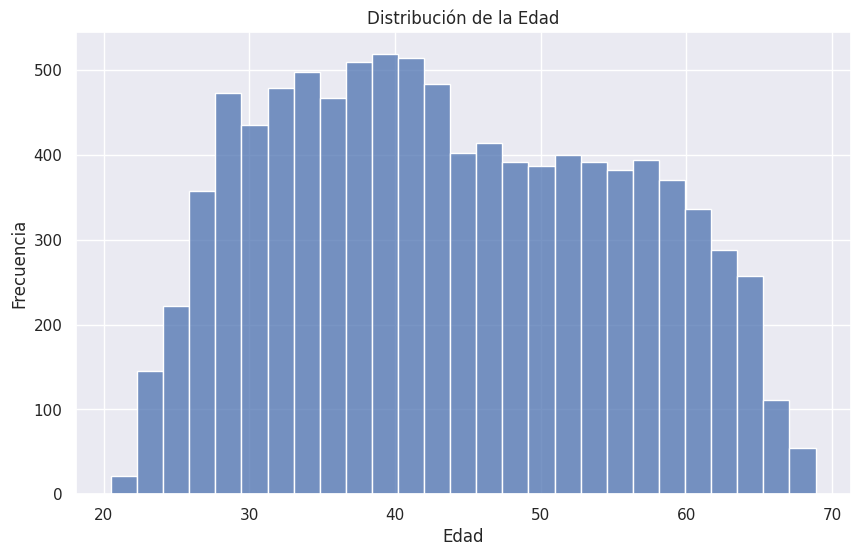

In [39]:

# Distribución de la Edad
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'])
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()




In [41]:
# Resumen numérico de la Edad
df['Age'].describe()

count    9709.000000
mean       43.784093
std        11.625768
min        20.504186
25%        34.059563
50%        42.741466
75%        53.567151
max        68.863837
Name: Age, dtype: float64

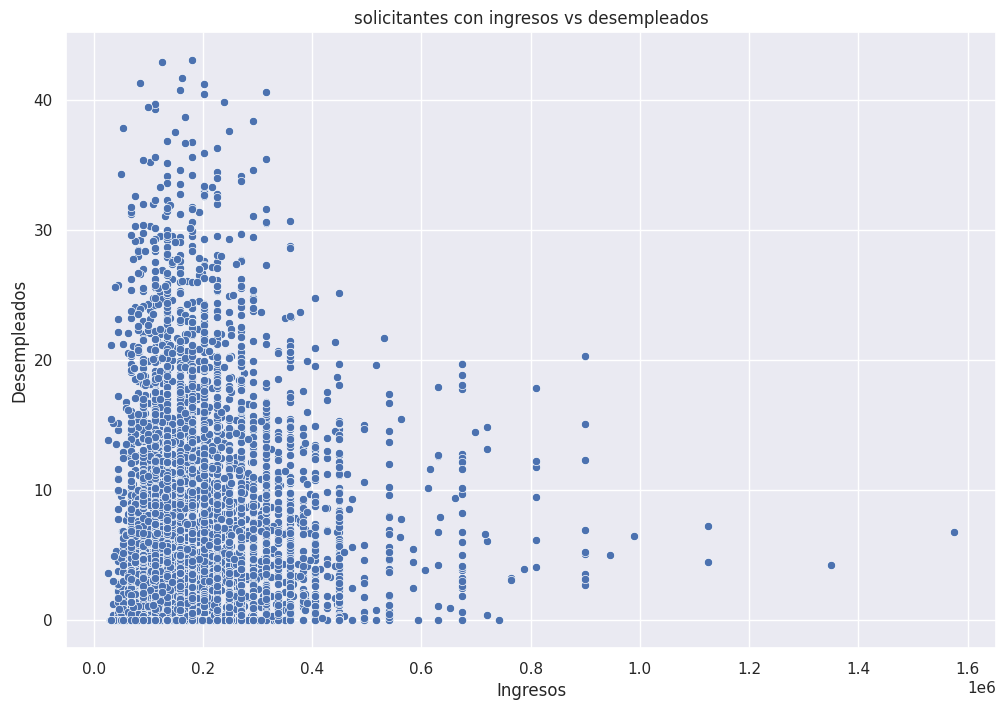

In [52]:
# Relación entre solicitantes con ingresos anual y desempleados
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Total_income', y='Years_employed', data=df)
plt.title('solicitantes con ingresos vs desempleados')
plt.xlabel('Ingresos')
plt.ylabel('Desempleados')
plt.show()